In [1]:
import os
import xarray as xr # For dealing with netCDF data
import pandas as pd
import netCDF4 as nc # Another way to deal with netCDF data
import datetime
import warnings
import netCDF4
from xarray import DataArray
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as colors
import mat73
import numpy as np
import glob
import cmocean
from matplotlib.colors import LogNorm
from matplotlib import gridspec, ticker, cm

plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings("ignore")


print("done.")

done.


In [2]:
### Create colormap 'parula'
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)


print("done.")

done.


In [3]:
### open netCDF files
path="./LAPSE-RATE/DPLR1/"
path2="./LAPSE-RATE/DPLR2/"
path3="./LAPSE-RATE/CLMPS/"

DPLR1=xr.open_dataset(path + "UCB.DPLR1.d1.20180713.233910.cdf")
DPLR2=xr.open_dataset(path2 + "UCB.DPLR2.d1.20180713.233420.cdf")
CLMPS=xr.open_dataset(path3 + "UCB.CLMPS.d1.20180715.000017.cdf")


print("done.")

done.


Plotting: [LAPSE-RATE (winds)]
done.


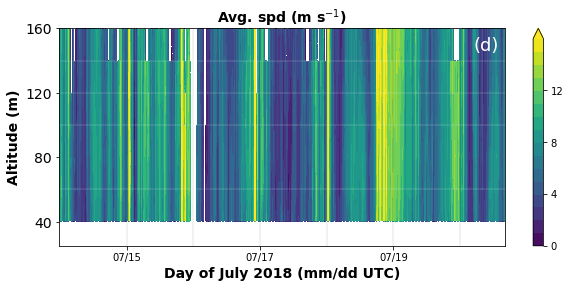

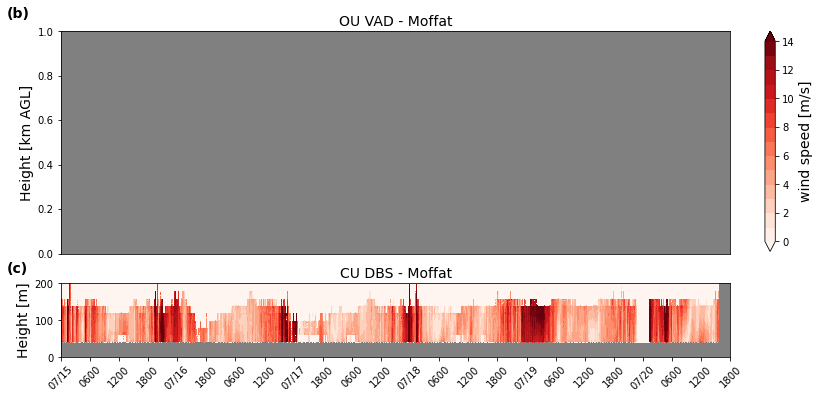

In [4]:
### LAPSE-RATE (winds)
print("Plotting: [LAPSE-RATE (winds)]")
fig=plt.figure(figsize=(10,4))

dplr1_levels = np.linspace(0,16,17) # replace '17':'65' for lower:higher resolution colors
dplr2_levels = np.linspace(0,14,15) # replace '15':'57' for lower:higher resolution colors

ax=fig.add_subplot(111)  ### Fig 2d: https://journals.ametsoc.org/view/journals/bams/101/5/bams-d-19-0050.1.xml
plt.contourf(DPLR1['time'], DPLR1['height'], DPLR1['wspd'].T, dplr1_levels, extend='max', cmap='viridis')
plt.axhline(y=60,color='#FFFFFF',linewidth=0.2)
plt.axhline(y=100,color='#FFFFFF',linewidth=0.2)
plt.axhline(y=120,color='#FFFFFF',linewidth=0.2)
plt.axhline(y=140,color='#FFFFFF',linewidth=0.2)
plt.axvline(x=1531612800,color='black',linewidth=0.1)
plt.axvline(x=1531699200,color='black',linewidth=0.1)
plt.axvline(x=1531785600,color='black',linewidth=0.1)
plt.axvline(x=1531872000,color='black',linewidth=0.1)
plt.axvline(x=1531958400,color='black',linewidth=0.1)
plt.axvline(x=1532044800,color='black',linewidth=0.1)
x=plt.colorbar(ticks=np.linspace(0,16,4, endpoint=False))
plt.xlabel('Day of July 2018 (mm/dd UTC)',fontsize=14,fontweight='bold')
plt.ylabel('Altitude (m)',fontsize=14,fontweight='bold')
plt.title("Avg. spd (m s$^{-1}$)",fontsize=14,fontweight='bold')
plt.ylim(25,160)
plt.yticks(ticks=[40,80,120,160],fontsize=14)
plt.xticks(ticks=[1531612800,1531785600,1531958400],labels=['07/15','07/17','07/19'],fontsize=10)
ax.text(0.93,0.9,'(d)',transform=ax.transAxes,fontsize=18,color='#FFFFFF')

fig=plt.figure(figsize=(12,6))
spec=gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[3,1])

ax=fig.add_subplot(spec[0],facecolor='grey')  ### Fig 5b: https://essd.copernicus.org/articles/13/1041/2021/
plt.contourf(CLMPS['time'], CLMPS['height_slanted'], CLMPS['wspd'].T, dplr2_levels, extend='both', cmap='Reds')
plt.ylabel('Height [km AGL]',fontsize=14)
plt.title("OU VAD - Moffat",fontsize=14)
plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlim(1531612800,1532044800)
plt.xticks([])
x=plt.colorbar(ticks=np.linspace(0,14,8, endpoint=True), cax=plt.axes([0.94,0.37,0.012,0.51]))
x.set_label('wind speed [m/s]',fontsize=14)
plt.text(-0.08,1.06,'(b)',transform=ax.transAxes,fontsize=14,fontweight='bold')

ax=fig.add_subplot(spec[1],facecolor='grey')  ### Fig 5c: https://essd.copernicus.org/articles/13/1041/2021/
plt.contourf(DPLR2['time'], DPLR2['height'], DPLR2['wspd'].T, dplr2_levels, extend='both', cmap='Reds')
plt.ylabel('Height [m]',fontsize=14)
plt.title("CU DBS - Moffat",fontsize=14)
plt.ylim(0,200)
plt.yticks([0,100,200])
plt.xlim(1531612800,1532044800)
plt.xticks(ticks=[1531612800,1531634400,1531656000,1531677600,1531699200,1531742400,1531764000,1531720800,1531785600,1531828800,1531850400,1531807200,1531872000,1531893600,1531915200,1531936800,1531958400,1531980000,1532001600,1532023200,1532044800,1532066400,1532088000,1532109600], labels=['07/15','0600','1200','1800','07/16','0600','1200','1800','07/17','0600','1200','1800','07/18','0600','1200','1800','07/19','0600','1200','1800','07/20','0600','1200','1800'], rotation=45)
plt.text(-0.08,1.14,'(c)',transform=ax.transAxes,fontsize=14,fontweight='bold')


print('done.')

Plotting: [LAPSE-RATE (ε)]
done.


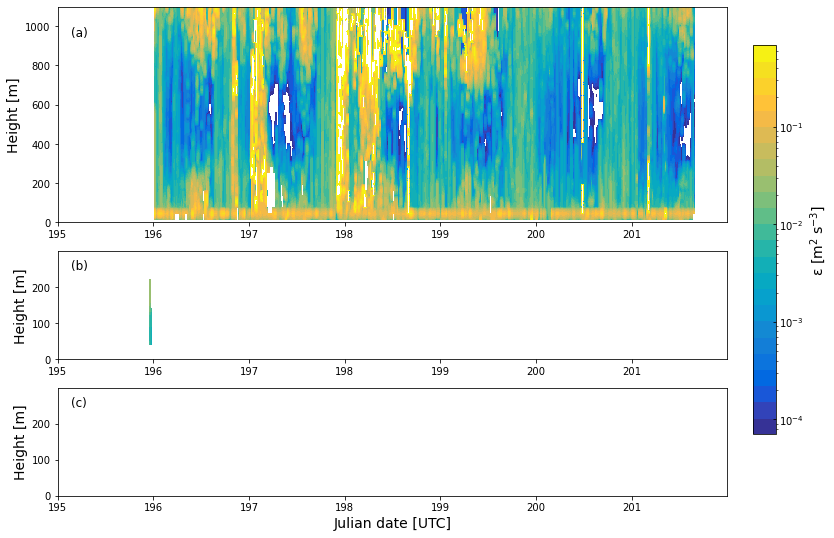

In [19]:
### LAPSE-RATE ε
print("Plotting: [LAPSE-RATE (\u03B5)]")
fig=plt.figure(figsize=(12,9))  ### Fig 5: https://essd.copernicus.org/articles/13/3539/2021/essd-13-3539-2021.html
spec=gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[2,1,1])

e_levels = np.logspace(-4,0,25, endpoint=False, base=10.9)

ax=fig.add_subplot(spec[0])
plt.contourf(CLMPS['time'], CLMPS['height_vertical'], CLMPS['epsilon_30min'], e_levels, norm=colors.LogNorm(), cmap=parula_map)
plt.ylabel('Height [m]',fontsize=14)
plt.ylim(0,1100)
plt.yticks(ticks=[0,200,400,600,800,1000],fontsize=10)
plt.xlim(1531526400,1532131200)
plt.xticks(ticks=[1531526400,1531612800,1531699200,1531785600,1531872000,1531958400,1532044800],labels=['195','196','197','198','199','200','201'],fontsize=10)
plt.text(0.02,0.86,'(a)',transform=ax.transAxes,fontsize=12)

ax=fig.add_subplot(spec[1])
plt.contourf(DPLR2['time'], DPLR2['height'], DPLR2['epsilon_30min'], e_levels, norm=colors.LogNorm(), cmap=parula_map)
plt.ylabel('Height [m]',fontsize=14)
plt.ylim(0,300)
plt.yticks(ticks=[0,100,200],fontsize=10)
plt.xlim(1531526400,1532131200)
plt.xticks(ticks=[1531526400,1531612800,1531699200,1531785600,1531872000,1531958400,1532044800],labels=['195','196','197','198','199','200','201'],fontsize=10)
ax.text(0.02,0.83,'(b)',transform=ax.transAxes,fontsize=12)

ax=fig.add_subplot(spec[2])
plt.contourf(DPLR1['time'], DPLR1['height'], DPLR1['epsilon_30min'], e_levels, norm=colors.LogNorm(), cmap=parula_map)
plt.xlabel('Julian date [UTC]',fontsize=14)
plt.ylabel('Height [m]',fontsize=14)
plt.ylim(0,300)
plt.yticks(ticks=[0,100,200],fontsize=10)
plt.xlim(1531526400,1532131200)
plt.xticks(ticks=[1531526400,1531612800,1531699200,1531785600,1531872000,1531958400,1532044800],labels=['195','196','197','198','199','200','201'],fontsize=10)
x=plt.colorbar(cax=plt.axes([0.93,0.22,0.026,0.6]))
x.set_ticks([0.0001,0.001,0.01,0.1])
x.set_ticklabels(['10$^{-4}$','10$^{-3}$','10$^{-2}$','10$^{-1}$'])
x.set_label('\u03B5 [m$^{2}$ s$^{-3}$]',fontsize=14)
x.ax.tick_params(axis='y',direction='in')
ax.text(0.02,0.83,'(c)',transform=ax.transAxes,fontsize=12)


print("done.")

In [ ]:
### WFIP2
